In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [62]:
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/data.csv'
response = requests.get(url)
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [63]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [64]:
pd.isna(df).any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [65]:
price = df['price'].loc[df['price'] != '?']
print(price)
pmean = price.astype(int).mean()
print("Mean =",pmean)
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head(10)

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: object
Mean = 13207.129353233831


0    13495
1    16500
2    16500
3    13950
4    17450
5    15250
6    17710
7    18920
8    23875
9    13207
Name: price, dtype: int64

In [66]:
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [67]:
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int64

<Axes: xlabel='make'>

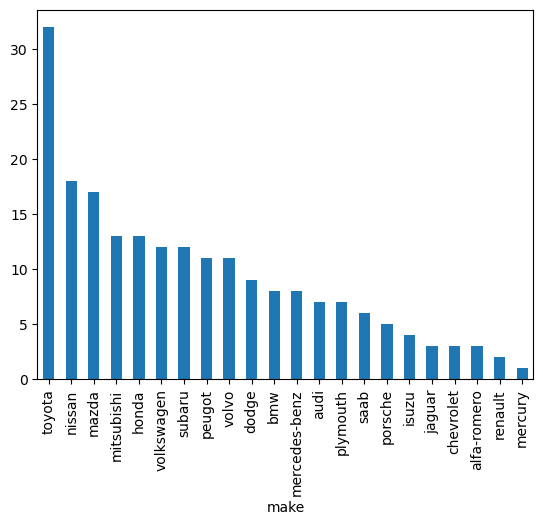

In [54]:
df.make.value_counts().nlargest(30).plot(kind="bar")

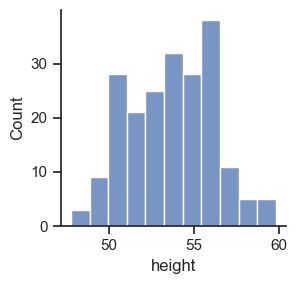

In [82]:
sns.FacetGrid(df).map(sns.histplot, "height").add_legend()

<Axes: xlabel='make', ylabel='price'>

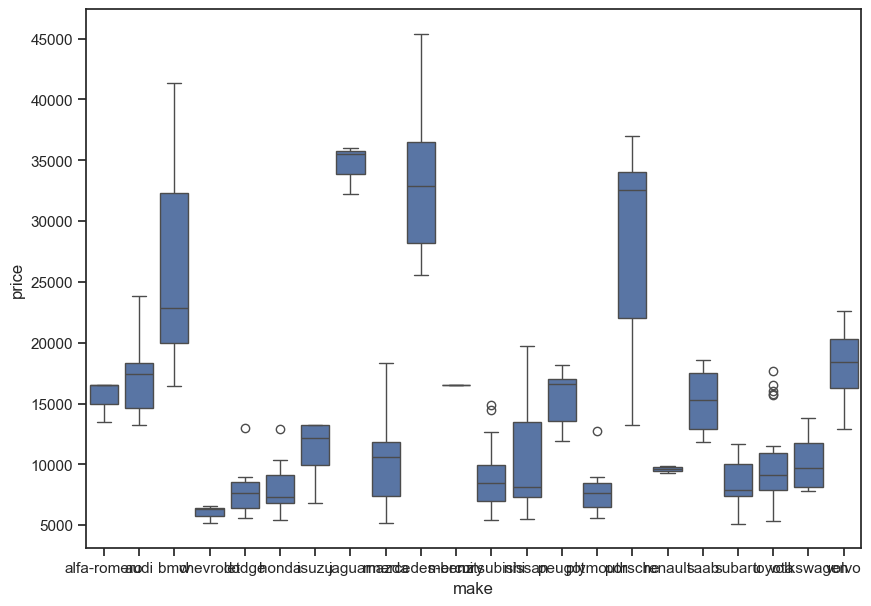

In [84]:
plt.figure(figsize=(10,7))
sns.boxplot(x="make", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

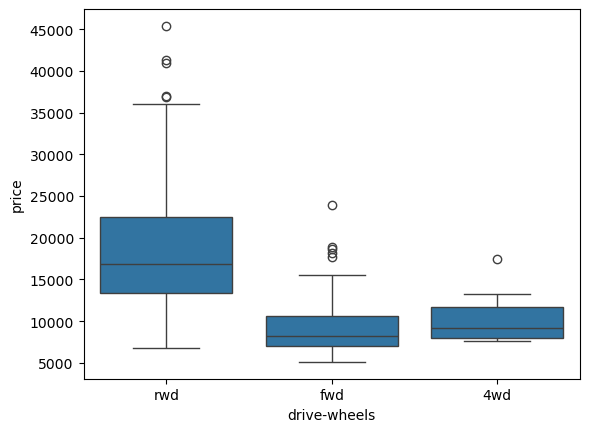

In [68]:
sns.boxplot(x="drive-wheels", y="price", data=df)

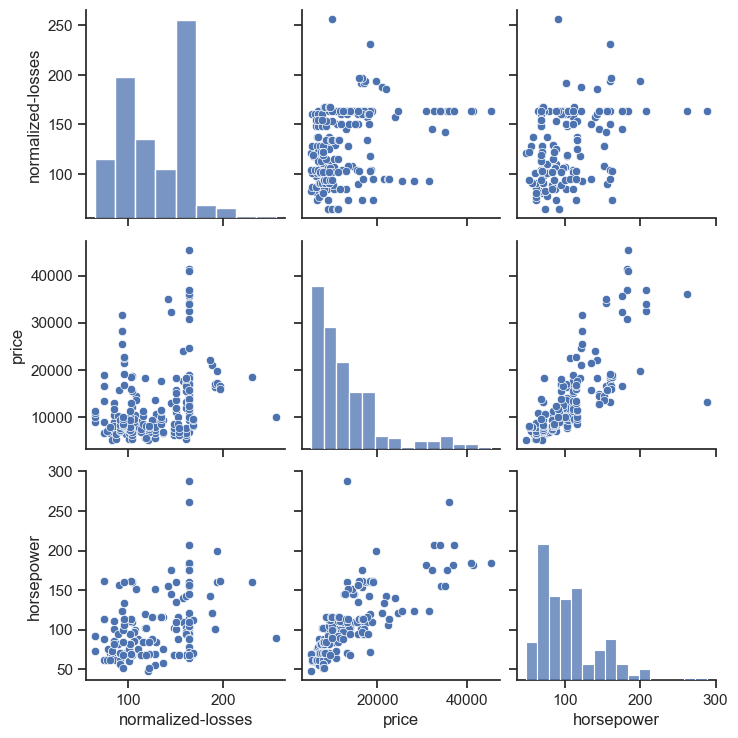

In [87]:
sns.pairplot(df, vars=["normalized-losses", "price", "horsepower"], kind="scatter")

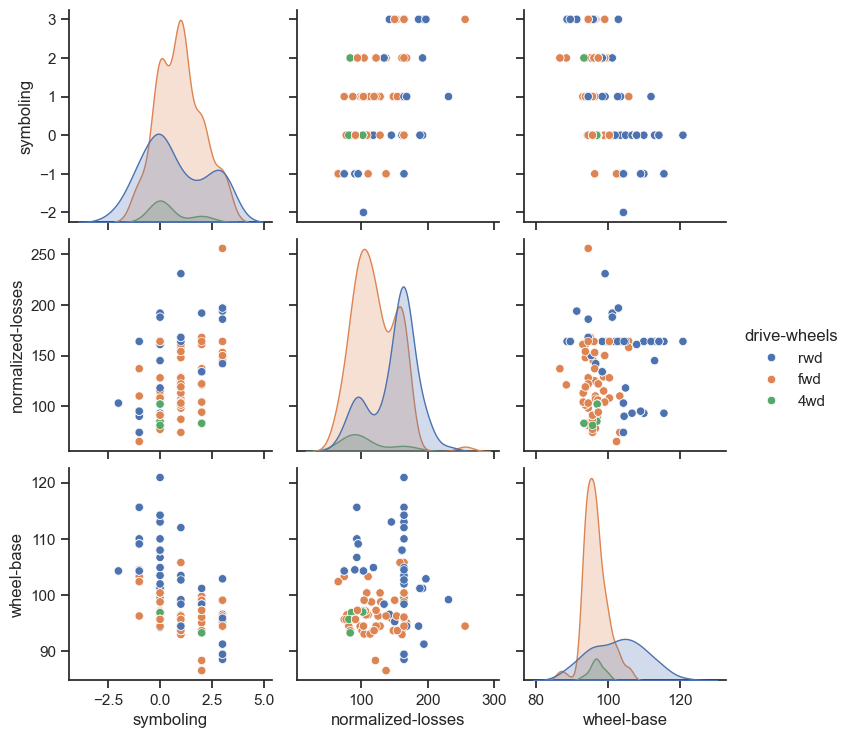

In [75]:
sns.pairplot(df, vars=["symboling", "normalized-losses", "wheel-base"], hue="drive-wheels")

<Axes: >

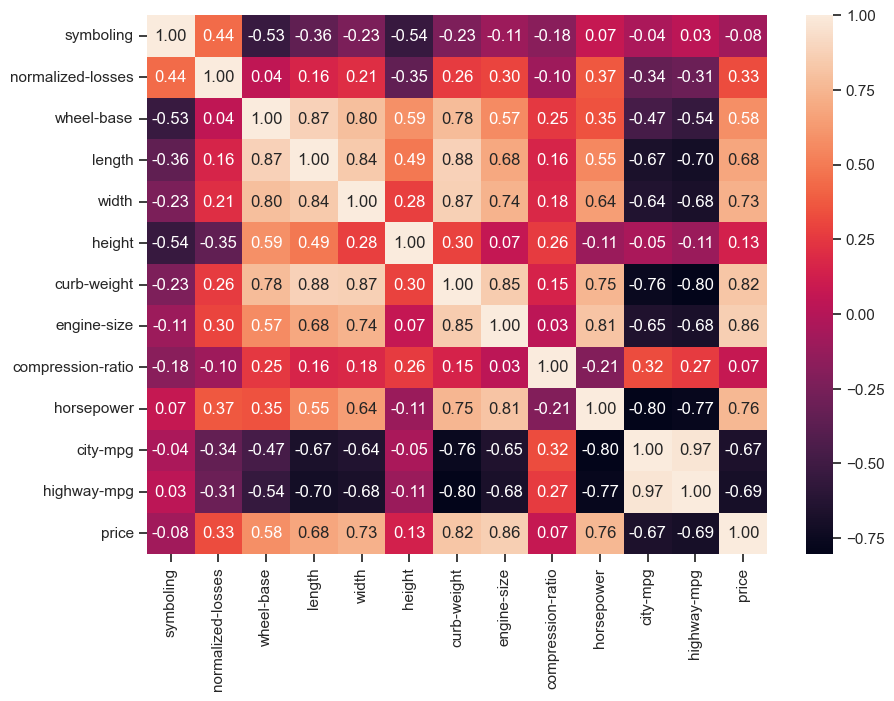

In [79]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(method="pearson", numeric_only=True), annot=True, fmt=".2f")